# Bachelorarbeit - Evaluierung und Vergleich der Front-End Technologien Angular und React
## Andreas Kappel, BSWE, 2010859008

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

### Reading the input file and drop empty entries

In [3]:
log_data = pd.read_csv('log_dom.csv')

In [4]:
log_data.dropna()

,browser,app,event,size,time
0,Chrome,Angular,domManipulation_ADD,1,0.700000
1,Chrome,Angular,domManipulation_EDIT,1,1.300000
2,Chrome,Angular,domManipulation_DELETE,1,0.600000
3,Chrome,Angular,domManipulation_ADD,1,0.600000
4,Chrome,Angular,domManipulation_EDIT,1,0.200000
...,...,...,...,...,...
23995,Firefox,React,domManipulation_EDIT,1000,77.870494
23996,Firefox,React,domManipulation_DELETE,1000,88.291382
23997,Firefox,React,domManipulation_ADD,1000,141.155669
23998,Firefox,React,domManipulation_EDIT,1000,74.743005


### Group by App and calculate min, max and average

In [5]:
app = 'React'
size = 1000

chrome = log_data.query("size == @size").query("app == @app").query("browser == 'Chrome'")
firefox = log_data.query('size == @size').query("app == @app").query("browser == 'Firefox'")

c_sum = chrome.groupby('event').agg({'time': ['min', 'max', 'mean', 'std', 'size']})
f_sum = firefox.groupby('event').agg({'time': ['min', 'max', 'mean', 'std', 'size']})

print(f"\nSummary Chrome for {size} elements in {app}:")
display(c_sum)
print(f"\nSummary Firefox for {size} elements in {app}:")
display(f_sum)


Summary Chrome for 1000 elements in React:


time                                 
                              min    max       mean       std size
event                                                             
domManipulation_ADD     56.700000  100.6  69.275087  3.733986  500
domManipulation_DELETE  36.400937   76.7  40.886653  2.950502  500
domManipulation_EDIT    35.400000   91.6  43.487236  4.271413  500


Summary Firefox for 1000 elements in React:


time                                        
                               min         max        mean        std size
event                                                                     
domManipulation_ADD     107.441785  196.270362  128.883347   9.822106  500
domManipulation_DELETE   68.698988  133.677291   80.975095  10.049055  500
domManipulation_EDIT     58.118170  123.307606   72.689171   9.585568  500

### Plot grouped dataframe as bar chart

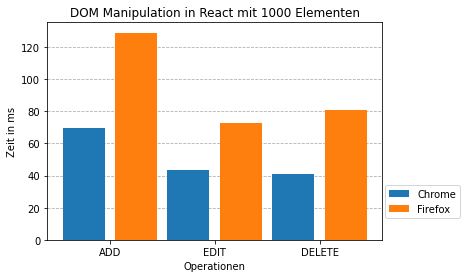

In [6]:
events = ['ADD', 'EDIT', 'DELETE']
x_axis = np.arange(len(events))

c_val = [
    c_sum['time']['mean']['domManipulation_ADD'],
    c_sum['time']['mean']['domManipulation_EDIT'],
    c_sum['time']['mean']['domManipulation_DELETE']
]
    
f_val = [
    f_sum['time']['mean']['domManipulation_ADD'],
    f_sum['time']['mean']['domManipulation_EDIT'],
    f_sum['time']['mean']['domManipulation_DELETE']
]

plt.bar(x_axis - 0.25, c_val, width=0.4, label='Chrome', zorder=10)
plt.bar(x_axis + 0.25, f_val, width=0.4, label='Firefox', zorder=10)

plt.grid(axis='y', linestyle='dashed', zorder=0)
plt.title(f"DOM Manipulation in {app} mit {size} {'Elementen' if size != 1 else 'Element'}")
plt.xticks(x_axis, events, rotation=-0)
plt.ylabel("Zeit in ms")
plt.xlabel("Operationen")
plt.legend(loc=[1.01, 0.1])

plt.savefig(f"./charts/plot_{app}_{size}.png", bbox_inches="tight", transparent=True)